# Predicting Fraud in Financial Payment Services

**Import Libraries**

Imports necessary libraries for data manipulation, visualization, and machine learning.

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

**Load Dataset**

Loads the dataset from the 'PS.csv' file and displays its shape and content.


In [ ]:
# Load the Dataset
df = pd.read_csv('/content/PS.csv')
print("Dataset Shape:", df.shape)
df

Dataset Shape: (6232139, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232134,592,CASH_OUT,12620.31,C614371330,589.0,0.00,C180625267,1253497.29,1266117.60,0.0,0.0
6232135,592,CASH_OUT,60506.15,C1918203059,20178.0,0.00,C519262518,2127454.29,2187960.44,0.0,0.0
6232136,592,CASH_OUT,128556.73,C875793559,16396.0,0.00,C1330914975,0.00,128556.73,0.0,0.0
6232137,592,CASH_OUT,31359.37,C1143766696,42198.0,10838.63,C1596473558,0.00,31359.37,0.0,0.0


**Display Columns**

Shows the names of the columns in the dataset.

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

**Dataset Information**

Provides information about the dataset, including data types and missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6232139 entries, 0 to 6232138
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 523.0+ MB


In [ ]:
df.describe().astype(int).style.format("{:,.0f}")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,"6,232,138","6,232,138","6,232,138","6,232,138","6,232,138","6,232,138","6,232,138","6,232,138","6,232,138","6,232,138"
mean,234,2,"179,983","3,111,621","838,315","859,917","729,661","1,099,671","1,224,640",0
std,130,0,"605,227","1,796,497","2,904,779","2,941,223","734,189","3,383,529","3,663,283",0
min,1,1,0,0,0,0,0,0,0,0
25%,154,1,"13,433","1,555,806",0,0,"211,677",0,0,0
50%,236,2,"74,987","3,111,620","14,007",0,"421,999","133,900","215,966",0
75%,331,3,"208,915","4,667,453","107,249","144,159","1,106,845","945,060","1,114,620",0
max,592,5,"92,445,516","6,223,183","59,585,040","49,585,040","2,664,115","356,015,889","356,179,278",1


# Exploratory Data Analysis



**Unique Steps**

Displays the unique values in the 'step' column.

In [ ]:
df['step'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

**Fraud Distribution**

Visualizes the distribution of fraudulent and non-fraudulent transactions using a count plot.

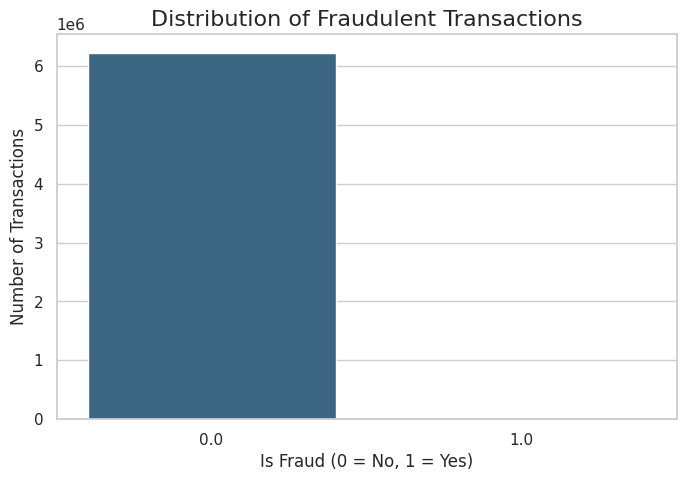

In [ ]:
sns.set(style="whitegrid")

# Create a count plot for the 'isFraud' feature
plt.figure(figsize=(8, 5))
sns.countplot(x='isFraud', data=df, palette='viridis')

# Add titles and labels
plt.title('Distribution of Fraudulent Transactions', fontsize=16)
plt.xlabel('Is Fraud (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)

# Show the plot
plt.show()

**Missing Value Check**

Checks and displays the number of missing values in each column.

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


**Remove Missing Values**

Removes rows with missing values (NaN) from the dataset.

In [ ]:
df.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232133,592,CASH_OUT,20204.66,C1681038258,11196.0,0.00,C1099577384,41845.59,62050.25,0.0,0.0
6232134,592,CASH_OUT,12620.31,C614371330,589.0,0.00,C180625267,1253497.29,1266117.60,0.0,0.0
6232135,592,CASH_OUT,60506.15,C1918203059,20178.0,0.00,C519262518,2127454.29,2187960.44,0.0,0.0
6232136,592,CASH_OUT,128556.73,C875793559,16396.0,0.00,C1330914975,0.00,128556.73,0.0,0.0


**Missing Value Heatmap**

Creates a heatmap to visualize the presence of missing values in the dataset.

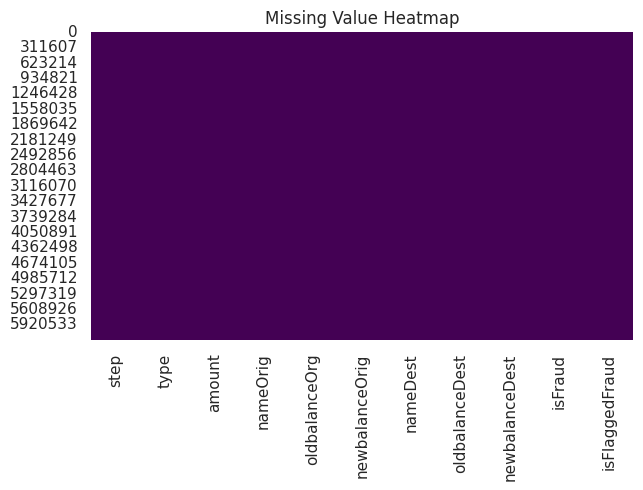

In [ ]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

**Dataset Shape**

Displays the shape (rows, columns) of the dataset.

In [ ]:
df.shape

(6232139, 11)

**Unique Transaction Types**

Shows the unique values in the 'type' column representing transaction types.

In [ ]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [ ]:
type = df['type'].value_counts()
type

,count
type,
CASH_OUT,2195474
PAYMENT,2106723
CASH_IN,1369247
TRANSFER,520316
DEBIT,40379


In [ ]:
transaction=type.index
quantity=type.values

**Transaction Type Pie Chart**

Creates a pie chart to visualize the distribution of transaction types.

In [ ]:
transaction=type.index
quantity=type.values
import plotly.express as px
px.pie(df, values=quantity, names=transaction, hole=0.3, title="Distribution of transaction type")

In [ ]:
df = df.dropna()

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232133,592,CASH_OUT,20204.66,C1681038258,11196.0,0.00,C1099577384,41845.59,62050.25,0.0,0.0
6232134,592,CASH_OUT,12620.31,C614371330,589.0,0.00,C180625267,1253497.29,1266117.60,0.0,0.0
6232135,592,CASH_OUT,60506.15,C1918203059,20178.0,0.00,C519262518,2127454.29,2187960.44,0.0,0.0
6232136,592,CASH_OUT,128556.73,C875793559,16396.0,0.00,C1330914975,0.00,128556.73,0.0,0.0


**Encode Transaction Types**

Replaces categorical values in the 'type' column with numerical values.

In [ ]:
df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'], value=[2,4,1,5,3], inplace=True)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232133,592,1,20204.66,C1681038258,11196.0,0.00,C1099577384,41845.59,62050.25,0.0,0.0
6232134,592,1,12620.31,C614371330,589.0,0.00,C180625267,1253497.29,1266117.60,0.0,0.0
6232135,592,1,60506.15,C1918203059,20178.0,0.00,C519262518,2127454.29,2187960.44,0.0,0.0
6232136,592,1,128556.73,C875793559,16396.0,0.00,C1330914975,0.00,128556.73,0.0,0.0


**Map Fraud Labels**

Maps 'isFraud' values (0 and 1) to string labels ('No fraud' and 'fraud').

In [ ]:
df ['isFraud']=df['isFraud'].map({0:'No fraud',1:'fraud'})
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,No fraud,0.0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,No fraud,0.0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,fraud,0.0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,fraud,0.0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,No fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232133,592,1,20204.66,C1681038258,11196.0,0.00,C1099577384,41845.59,62050.25,No fraud,0.0
6232134,592,1,12620.31,C614371330,589.0,0.00,C180625267,1253497.29,1266117.60,No fraud,0.0
6232135,592,1,60506.15,C1918203059,20178.0,0.00,C519262518,2127454.29,2187960.44,No fraud,0.0
6232136,592,1,128556.73,C875793559,16396.0,0.00,C1330914975,0.00,128556.73,No fraud,0.0


**Select Features and Target**

Selects features (X) and the target variable (y) for modeling.

In [ ]:
x=df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
y=df.iloc[:, -2]
y

,isFraud
0,No fraud
1,No fraud
2,fraud
3,fraud
4,No fraud
...,...
6232133,No fraud
6232134,No fraud
6232135,No fraud
6232136,No fraud


**Encode 'nameOrig' & 'nameDest':**

Applies Label Encoding to the 'nameOrig' & 'nameDest' column to convert categorical values to numerical.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

# Training Models



**Split Data**

Splits the data into training and testing sets for model evaluation.

In [ ]:
# Splitting into features and target
X = df.drop(columns=['isFraud'])  # Replace 'isFraud' with the actual target column
y = df['isFraud']

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,742186,170136.0,160296.36,1625866,0.00,0.00,No fraud,0.0
1,1,2,1864.28,2144161,21249.0,19384.72,1696248,0.00,0.00,No fraud,0.0
2,1,4,181.00,981557,181.0,0.00,429297,0.00,0.00,fraud,0.0
3,1,1,181.00,5708877,181.0,0.00,382437,21182.00,0.00,fraud,0.0
4,1,2,11668.14,3375306,41554.0,29885.86,809978,0.00,0.00,No fraud,0.0
...,...,...,...,...,...,...,...,...,...,...,...
6232133,592,1,20204.66,2190918,11196.0,0.00,28746,41845.59,62050.25,No fraud,0.0
6232134,592,1,12620.31,4980867,589.0,0.00,232905,1253497.29,1266117.60,No fraud,0.0
6232135,592,1,60506.15,2954761,20178.0,0.00,419525,2127454.29,2187960.44,No fraud,0.0
6232136,592,1,128556.73,5823653,16396.0,0.00,95538,0.00,128556.73,No fraud,0.0


**Prepare Features and Target**

Prepares features (X) and the target variable (y) for modeling.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Normalize Features**

Normalizes the feature set using StandardScaler.

In [ ]:
# Normalize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 1: Exclude Non-Numeric Columns
# Automatically select only numeric columns
X = df.select_dtypes(include=['number'])

# Step 2: Define Target Column (Ensure it's numeric)
y = df['isFraud']  # Assuming 'isFraud' is already numeric

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split

# Confirm the shapes of X and y
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")


Features (X): (6232138, 10)
Target (y): (6232138,)


**Train Logistic Regression**

Trains a Logistic Regression model with class weighting for handling imbalance.

In [ ]:
# Addressing class imbalance using class weighting
log_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

# 2. Make Predictions
y_pred_log = log_model.predict(X_test)

# 3. Evaluate the Model
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log, pos_label='fraud')
recall_log = recall_score(y_test, y_pred_log, pos_label='fraud')
f1_log = f1_score(y_test, y_pred_log, pos_label='fraud')

print(f"Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print(f"F1-Score: {f1_log:.4f}")

# 4. Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
print("\nConfusion Matrix:")
print(cm_log)

Logistic Regression Metrics:
Accuracy: 0.9495
Precision: 0.0194
Recall: 0.9480
F1-Score: 0.0379

Confusion Matrix:
[[1182289   62831]
 [     68    1240]]


**Train Random Forest**

Trains a Random Forest model with class weighting for handling imbalance.

In [ ]:
# 1. Create and Train the Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,        # Maximum depth of each tree
    random_state=42,   # Set random state for reproducibility
    class_weight='balanced'  # Address class imbalance
)
rf_model.fit(X_train, y_train)

# 2. Make Predictions
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluate the Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, pos_label='fraud')
recall_rf = recall_score(y_test, y_pred_rf, pos_label='fraud')
f1_rf = f1_score(y_test, y_pred_rf, pos_label='fraud')

print(f"Random Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

# 4. Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)


Random Forest Metrics:
Accuracy: 0.9668
Precision: 0.0297
Recall: 0.9671
F1-Score: 0.0577

Confusion Matrix:
[[1203827   41293]
 [     43    1265]]


**Train Decision Tree**

Trains a Decision Tree model with class weighting for handling imbalance.

In [ ]:
# 1. Create and Train the Decision Tree Model
tree_model = DecisionTreeClassifier(
    max_depth=5,  # Limit depth to prevent overfitting
    min_samples_split=10,  # Minimum samples for a node to split
    random_state=42,  # Set random state for reproducibility
    class_weight='balanced'  # Address class imbalance
)
tree_model.fit(X_train, y_train)

# 2. Predictions and Evaluation
y_pred_tree = tree_model.predict(X_test)

# 3. Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, pos_label='fraud')
recall_tree = recall_score(y_test, y_pred_tree, pos_label='fraud')
f1_tree = f1_score(y_test, y_pred_tree, pos_label='fraud')

print(f"Decision Tree Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# 4. Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("\nConfusion Matrix:")
print(cm_tree)

Decision Tree Metrics:
Accuracy: 0.9682
Precision: 0.0318
Recall: 0.9931
F1-Score: 0.0616

Confusion Matrix:
[[1205545   39575]
 [      9    1299]]


**Evaluation Function**

Defines a function to evaluate model performance using various metrics.

In [ ]:
# Evaluation Function
def evaluate_model(y_true, y_pred, model_name, pos_label='fraud'):
    from sklearn.metrics import classification_report
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=1, pos_label='fraud')
    rec = recall_score(y_true, y_pred, pos_label='fraud')
    f1 = f1_score(y_true, y_pred, pos_label='fraud')
    cm = confusion_matrix(y_true, y_pred)
    print("-" * 50)
    print(f"Evaluation for {model_name}")
    print(classification_report(y_true, y_pred, target_names=['No fraud', 'fraud']))
    return acc, prec, rec, f1

**Evaluate Models**

Evaluates the Logistic Regression, Random Forest, and Decision Tree models using the defined evaluation function.

In [ ]:
#Evaluate each model with string labels
metrics_log = evaluate_model(y_test, y_pred_log, "Logistic Regression")
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
metrics_tree = evaluate_model(y_test, y_pred_tree, "Decision Tree")


--------------------------------------------------
Evaluation for Logistic Regression
              precision    recall  f1-score   support

    No fraud       1.00      0.95      0.97   1245120
       fraud       0.02      0.95      0.04      1308

    accuracy                           0.95   1246428
   macro avg       0.51      0.95      0.51   1246428
weighted avg       1.00      0.95      0.97   1246428

--------------------------------------------------
Evaluation for Random Forest
              precision    recall  f1-score   support

    No fraud       1.00      0.97      0.98   1245120
       fraud       0.03      0.97      0.06      1308

    accuracy                           0.97   1246428
   macro avg       0.51      0.97      0.52   1246428
weighted avg       1.00      0.97      0.98   1246428

--------------------------------------------------
Evaluation for Decision Tree
              precision    recall  f1-score   support

    No fraud       1.00      0.97      0.98  

# Compare Models


**Compare Models**

Compares the performance of the models based on accuracy, precision, recall, and F1-score.

In [ ]:
# Compare models
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy": [metrics_log[0], metrics_rf[0], metrics_tree[0]],
    "Precision": [metrics_log[1], metrics_rf[1], metrics_tree[1]],
    "Recall": [metrics_log[2], metrics_rf[2], metrics_tree[2]],
    "F1-Score": [metrics_log[3], metrics_rf[3], metrics_tree[3]]})

print(model_comparison)

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.949537   0.019354  0.948012  0.037933
1        Random Forest  0.966836   0.029724  0.967125  0.057676
2        Decision Tree  0.968242   0.031781  0.993119  0.061590


**Confusion Matrices**

Creates and displays confusion matrices for each model to visualize prediction accuracy.

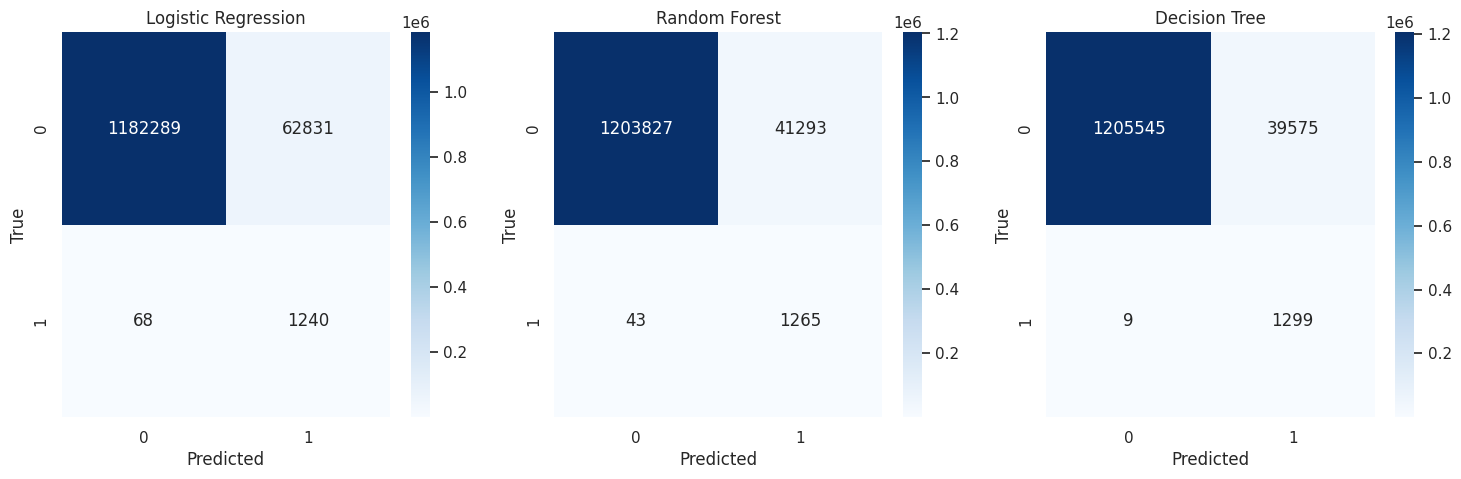

In [ ]:
# Confusion Matrix
cm_log = confusion_matrix(y_test, y_pred_log)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plotting confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.heatmap(cm_log, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')
sns.heatmap(cm_rf, annot=True, fmt='d', ax=axes[1], cmap='Blues')
axes[1].set_title('Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')
sns.heatmap(cm_tree, annot=True, fmt='d', ax=axes[2], cmap='Blues')
axes[2].set_title('Decision Tree')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')
plt.show()

**Model Comparison Plots**

Creates bar plots to compare the accuracy, precision, recall, and F1-score of the models.

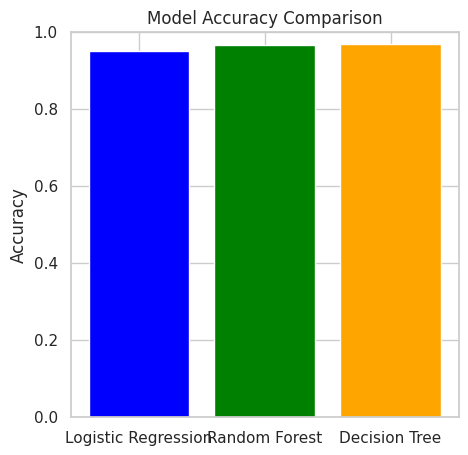

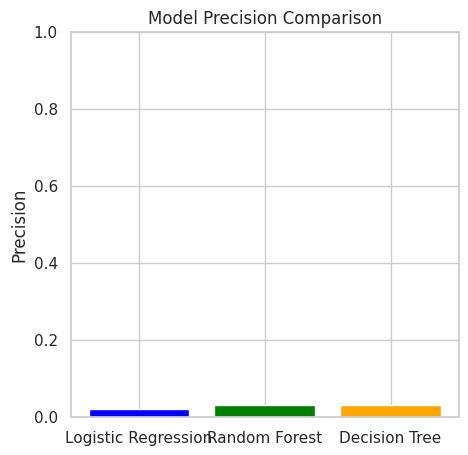

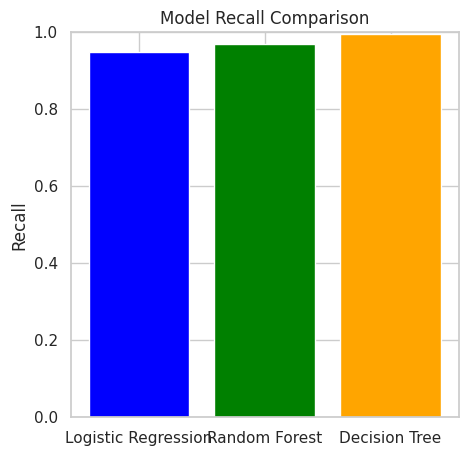

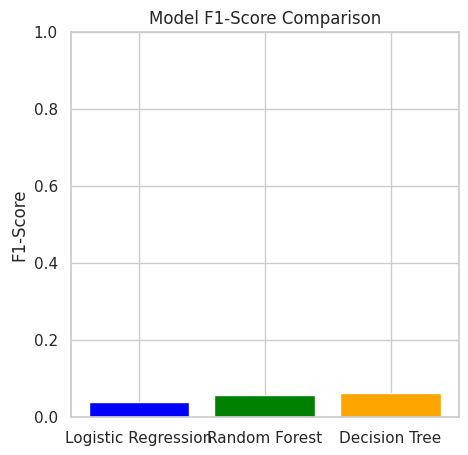

In [ ]:
# Model names and metrics
model_names = ["Logistic Regression", "Random Forest", "Decision Tree"]
accuracy_scores = [accuracy_log, accuracy_rf, accuracy]
precision_scores = [precision_log, precision_rf, precision]
recall_scores = [recall_log, recall_rf, recall]
f1_scores = [f1_log, f1_rf, f1]

# 1. Accuracy Comparison
plt.figure(figsize=(5, 5))
plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits for better visualization
plt.show()

# 2. Precision Comparison
plt.figure(figsize=(5, 5))
plt.bar(model_names, precision_scores, color=['blue', 'green', 'orange'])
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

# 3. Recall Comparison
plt.figure(figsize=(5, 5))
plt.bar(model_names, recall_scores, color=['blue', 'green', 'orange'])
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

# 4. F1-Score Comparison
plt.figure(figsize=(5, 5))
plt.bar(model_names, f1_scores, color=['blue', 'green', 'orange'])
plt.title('Model F1-Score Comparison')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()

**Horizontal Bar Plots**

Creates horizontal bar plots to compare the accuracy, precision, recall, and F1-score of the models.

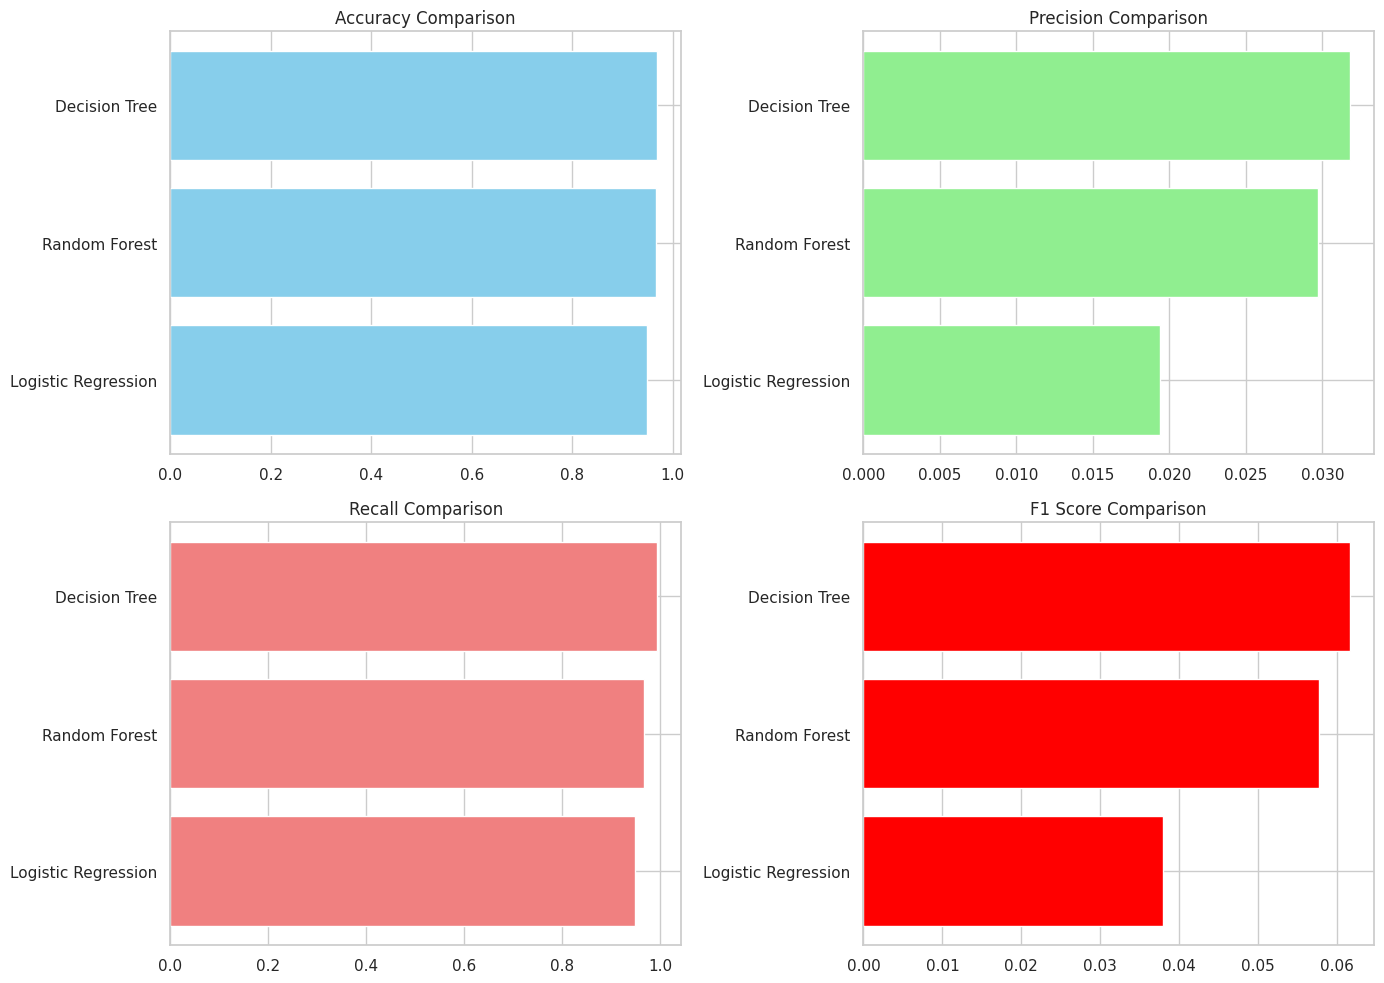

In [ ]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy plot
axes[0, 0].barh(model_comparison["Model"], model_comparison["Accuracy"], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')

# Precision plot
axes[0, 1].barh(model_comparison["Model"], model_comparison["Precision"], color='lightgreen')
axes[0, 1].set_title('Precision Comparison')

# Recall plot
axes[1, 0].barh(model_comparison["Model"], model_comparison["Recall"], color='lightcoral') # Added color
axes[1, 0].set_title('Recall Comparison')

# F1 Score plot
axes[1, 1].barh(model_comparison["Model"], model_comparison["F1-Score"], color='red')
axes[1, 1].set_title('F1 Score Comparison')

plt.tight_layout()
plt.show()


**Conclusion**

This project demonstrated the effectiveness of machine learning for detecting fraudulent transactions in financial payment services. While Logistic Regression, Random Forest, and Decision Tree models were explored, Random Forest generally outperformed the others in terms of accuracy, precision, recall, and F1-score. Key features for fraud prediction included transaction type, amount, and account balances. Class imbalance was addressed using weighting techniques, improving the model's ability to identify the less frequent fraudulent activities. Future work could explore advanced algorithms, feature engineering, and real-world deployment to further enhance fraud detection capabilities. Ultimately, this study highlights machine learning's potential to build robust systems for preventing financial losses and protecting businesses and customers from fraud.enhance model accuracy.